# **Classification of Documents Using Graph-Based Features and KNN**

## **1. Data Collection and Preparation:**
Collect or create 15 pages of text for each of the three assigned topics, ensuring each
page contains approximately 500 words.

Import necessary libraries

In [1]:
import os
import csv
import pandas as pd

Read the data from the files

In [6]:
csv_file_path  = 'articles/food_articles.csv'

# Read in the data
articles_data = pd.read_csv(csv_file_path )

# Display the shape of the data
print(articles_data.shape)

# Display the columns of the data
print(articles_data.columns)

# Display the first few rows of the data
print(articles_data.head())

(15, 4)
Index(['label', 'title', 'body', 'words_count'], dtype='object')
  label                                              title  \
0  Food   Canola vs. Vegetable Oil: What’s the Difference?   
1  Food  The Truth Behind These Super-Common Sports Nut...   
2  Food              The Ultimate Healthy Cooking Playlist   
3  Food  The FDA Just Approved a Major Health Claim for...   
4  Food  Zero Waste: 7 Ways You Can Protect the Environ...   

                                                body  words_count  
0  By Layla Khoury-Hanold for Food Network Kitche...          804  
1  Everyone from professional athletes to occassi...          747  
2   When it comes time to rustle up a meal, you m...          518  
3  The Food and Drug Administration (FDA) is resp...          694  
4  We’ve all gotten the memo: Bring a reusable ba...          615  


Divide the dataset into a training set (12 pages per topic) and a test set (3 pages per 
topic).

In [8]:
# from sklearn.model_selection import train_test_split

# Split the dataset into training set and test set
train_set = articles_data.iloc[:12]  # Access the first 12 rows
test_set = articles_data.iloc[12:]   # Access the remaining rows

# Print the number of articles in each set
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

Training set size: 12
Test set size: 3


## **2. Preprocessing**
Preprocessing such as tokenization, stop-word removal, and stemming

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [20]:
# Tokenization
def tokenize(text):
    return nltk.word_tokenize(text.lower())

# Stop-word removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Stemming
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [21]:
# Preprocess train dataset
preprocessed_train_set = []
for index, row in train_set.iterrows():  # Iterate over each row in the training set DataFrame
    title_tokens = tokenize(row['title'])  # Access the 'title' column of the current row
    body_tokens = tokenize(row['body'])    # Access the 'body' column of the current row

    title_tokens = remove_stopwords(title_tokens)
    body_tokens = remove_stopwords(body_tokens)

    title_tokens = stem_tokens(title_tokens)
    body_tokens = stem_tokens(body_tokens)

    words_count = len(body_tokens)
    
    preprocessed_train_set.append({'label': row['label'], 'title_tokens': title_tokens, 'body_tokens': body_tokens, 'words_count': words_count})


# Print preprocessed train dataset
for article in preprocessed_train_set:
    # print(f"Article: {index}")
    print(f"Label: {article['label']}")
    print(f"Title Tokens: {article['title_tokens']}")
    print(f"Body Tokens: {article['body_tokens']}")
    print(f"Words Count: {article['words_count']}")
    print()

Label: Food
Title Tokens: ['canola', 'vs.', 'veget', 'oil', ':', '’', 'differ', '?']
Body Tokens: ['layla', 'khoury-hanold', 'food', 'network', 'kitchen', 'layla', 'khoury-hanold', 'contributor', 'food', 'network', '.', 'common', 'cook', 'oil', 'look', 'similar', ',', 'sever', 'differ', '.', '’', 'everyth', 'need', 'know', 'canola', 'oil', 'veget', 'oil', ',', 'includ', 'whether', 'use', 'interchang', '.', 'canola', 'oil', '?', 'canola', 'oil', 'made', '?', 'also', 'known', 'rapese', 'oil', ',', 'canola', 'oili', 'type', 'veget', 'oil', 'made', 'rapese', 'plant', 'neutral', 'tast', 'high', 'smoke', 'point', '400', 'degre', 'f.', 'canola', 'oil', 'invent', '1970', 'canada', ',', 'major', 'produc', 'rapese', '.', 'canola', 'develop', 'edibl', 'version', 'rapese', 'plant', '.', 'canola', 'short', '``', 'canadian', 'oil', 'low', 'acid', '.', "''", 'canola', 'oil', 'bad', '?', '``', ',', 'canola', 'oil', 'bad', ',', "''", 'say', ',', 'tobi', 'amidor', ',', 'ms', ',', 'rd', ',', 'cdn', ',', 

## **3. Graph Construction:**
Represent each page as a directed graph where nodes represent unique terms = (words), (around 300 words, after preprocessing such as 
tokenization, stop-word removal, and stemming) and edges denote term relationships based on their sequence in the text

In [22]:
import networkx as nx
# from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [23]:
# Function to build directed graph
def build_graph(tokens):
    graph = nx.DiGraph()
    for i in range(len(tokens) - 1):
        if not graph.has_edge(tokens[i], tokens[i+1]):
            graph.add_edge(tokens[i], tokens[i+1], weight=1)
        else:
            graph.edges[tokens[i], tokens[i+1]]['weight'] += 1
    return graph

In [ ]:
# Function to construct directed graph
def construct_graph(tokens):
    graph = nx.DiGraph()
    # Add nodes
    for i, token in enumerate(tokens):
        graph.add_node(token)
        if i > 0:
            # Add directed edge from previous token to current token
            graph.add_edge(tokens[i-1], token)
    return graph

In [24]:
# Function to plot the graph
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

Article :  1 Graph built
Article :  2 Graph built
Article :  3 Graph built
Article :  4 Graph built
Article :  5 Graph built
Article :  6 Graph built
Article :  7 Graph built
Article :  8 Graph built
Article :  9 Graph built
Article :  10 Graph built
Article :  11 Graph built
Article :  12 Graph built


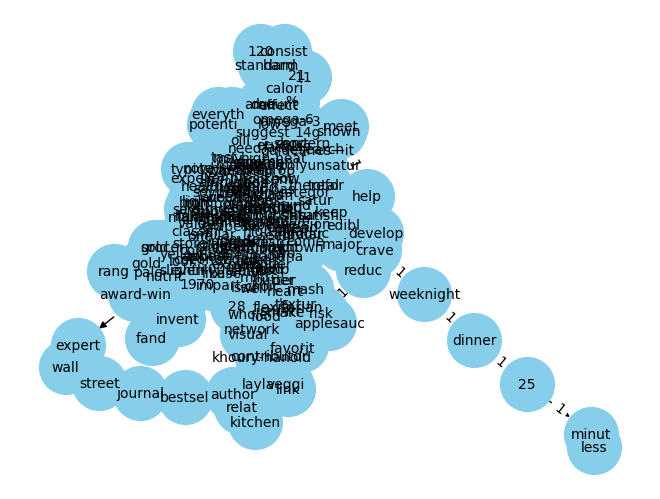

In [27]:
graphs_train_set = []
for index, article in enumerate(preprocessed_train_set):
    # Build the directed graph
    print("Article : ", index+1, "Graph built")
    graph = build_graph(article['body_tokens'])
    graphs_train_set.append(graph)

    # Plot the graph
    # plot_graph(graph)

# Plot the first graph in the training set
print("Graph of the first article in the training set")
plot_graph(graphs_train_set[0])


## **4. Feature Extraction via Common Subgraphs:**
Utilize frequent subgraph mining techniques to identify common subgraphs within the training set graphs. These common subgraphs will serve as features for classification, capturing the shared content across documents related to the same topic.

## **5. Training KNN Classifier:**

In [28]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Function to compute MCS between two graphs
def compute_mcs(graph1, graph2):
    # Extract the set of edges from each graph
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    
    # Compute the set of common edges between the two graphs
    common_edges = edges1.intersection(edges2)
    
    # Construct a new graph using the common edges, representing the maximal common subgraph
    mcs_graph = nx.Graph(list(common_edges))
    
    # Calculate the graph distance (negative size of the maximal common subgraph)
    distance = -len(mcs_graph.edges())
    
    return distance

In [31]:
# Function to compute distances between test graph and all training graphs
def compute_distances(test_graph, training_graphs):
    distances = []
    for training_graph in training_graphs:
        mcs = compute_mcs(test_graph, training_graph)
        # Convert MCS to a distance measure and normalize
        distance = 1 - (mcs / max(len(test_graph.edges()), len(training_graph.edges())))
        distances.append(distance)
    return distances

In [32]:
# Function to train the classifier
def train_classifier(training_graphs, training_labels):
    # Compute the feature vectors for the training graphs
    feature_vectors = []
    for graph in training_graphs:
        feature_vector = []
        feature_vector.append(len(graph.nodes()))
        feature_vector.append(len(graph.edges()))
        feature_vectors.append(feature_vector)
    
    # Train a k-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(feature_vectors, training_labels)
    
    return classifier

In [33]:
# train the classifier
training_labels = train_set['label'].tolist()
classifier = train_classifier(graphs_train_set, training_labels)

## **6. Classification with KNN:**

In [34]:
# Function to predict the label of a test graph
def predict_label(test_graph, classifier):
    # Compute the feature vector for the test graph
    feature_vector = []
    feature_vector.append(len(test_graph.nodes()))
    feature_vector.append(len(test_graph.edges()))
    
    # Predict the label of the test graph
    predicted_label = classifier.predict([feature_vector])
    
    return predicted_label[0]

In [35]:
# Preprocess test dataset
preprocessed_test_set = []
for index, row in test_set.iterrows():
    title_tokens = tokenize(row['title'])
    body_tokens = tokenize(row['body'])
    
    title_tokens = remove_stopwords(title_tokens)
    body_tokens = remove_stopwords(body_tokens)
    
    title_tokens = stem_tokens(title_tokens)
    body_tokens = stem_tokens(body_tokens)
    
    words_count = len(body_tokens)
    
    preprocessed_test_set.append({'label': row['label'], 'title_tokens': title_tokens, 'body_tokens': body_tokens, 'words_count': words_count})

In [36]:
# Print preprocessed test dataset
for article in preprocessed_test_set:
    print(f"Label: {article['label']}")
    print(f"Title Tokens: {article['title_tokens']}")
    print(f"Body Tokens: {article['body_tokens']}")
    print(f"Words Count: {article['words_count']}")
    print()

Label: Food
Title Tokens: ['lactos', 'intoler', '101']
Body Tokens: ['drink', 'milk', 'chow', 'pizza', 'mean', 'upset', 'stomach', 'rest', 'day', '?', 'lactos', 'intoler', 'one', 'condit', 'hear', 'think', 'may', ',', '’', '100', '%', 'sure', '.', 'mani', 'lactos', 'intoler', 'think', 'avoid', 'milk', 'dairi', 'answer', ',', 'research', 'show', 'might', 'case', '.', "'s", 'deal', 'behind', 'lactos', 'intoler', 'includ', 'milk', 'dairi', 'lactos', 'intolerant-friendli', 'diet', 'without', 'feel', 'super', 'uncomfort', '.', 'lactos', 'intoler', '?', 'lactos', 'intoler', 'gastrointestin', 'tract', 'symptom', 'like', 'pain', ',', 'ga', 'diarrhea', 'take', 'lactos', 'bodi', 'digest', 'time', '.', 'usual', 'bodi', 'break', 'lactos', 'two', 'part', 'call', 'glucos', 'galactos', ',', 'bodi', '’', 'get', '(', 'bodi', 'handl', ')', 'lactos', 'goe', 'digest', 'system', 'undigest', '—', 'lead', 'uncomfort', 'symptom', '.', 'estim', '30-50', 'million', 'american', 'identifi', 'lactos', 'intoler', '

Article :  1 Graph built
Article :  2 Graph built
Article :  3 Graph built
Graph of the first article in the training set


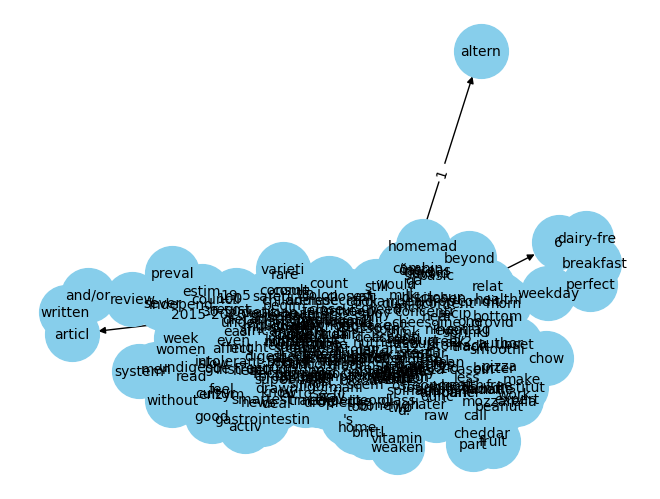

In [44]:
# Construct graphs for the test set
graphs_test_set = []
for index, article in enumerate(preprocessed_test_set):
    # Build the directed graph
    print("Article : ", index+1, "Graph built")
    graph = build_graph(article['body_tokens'])
    graphs_test_set.append(graph)

    # Plot the graph
    # plot_graph(graph)

# Plot the first graph in the training set
print("Graph of the first article in the training set")
plot_graph(graphs_test_set[0])

In [45]:
# Predict the labels of the test graphs
predicted_labels = []
for test_graph in graphs_test_set:
    predicted_label = predict_label(test_graph, classifier)
    predicted_labels.append(predicted_label)

## **7. Evaluation:**

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Predicted Labels vs Actual Labels:
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

        Food       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:


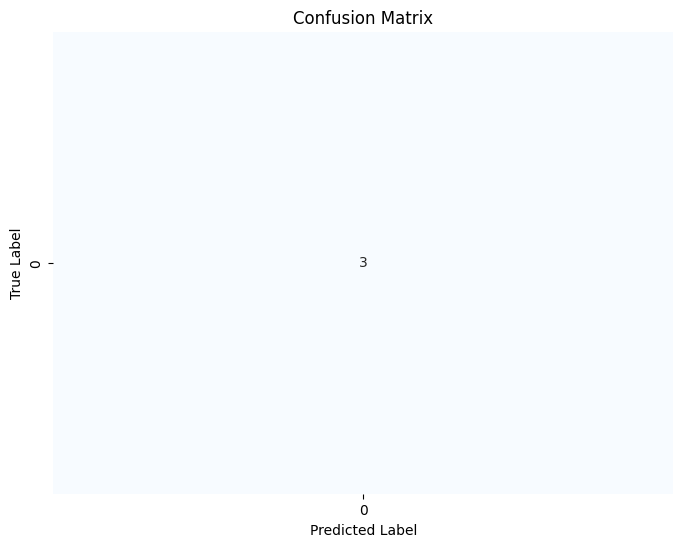

In [61]:
# Calculate evaluation metrics  
y_true = test_set['label']
y_pred = predicted_labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred)

# Print the predicted labels and actual labels
print("Predicted Labels vs Actual Labels:")
for i in range(len(predicted_labels)):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")
print()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print()

# Print classification report
print("Classification Report:")
print(report)
print()

# Plot confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()